In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Dropout


In [2]:
# Load the dataset
df = pd.read_csv("AEP_hourly.csv")

# Feature extraction
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["Month"] = df["Datetime"].dt.month
df["Year"] = df["Datetime"].dt.year
df["Date"] = df["Datetime"].dt.date
df["Time"] = df["Datetime"].dt.time
df["Week"] = df["Datetime"].dt.isocalendar().week
df["Day"] = df["Datetime"].dt.day_name()

# Set index to Datetime
df = df.set_index("Datetime")

# Display unique years and total count
print(df.Year.unique())
print("Total Number of Unique Year", df.Year.nunique())


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]
Total Number of Unique Year 15


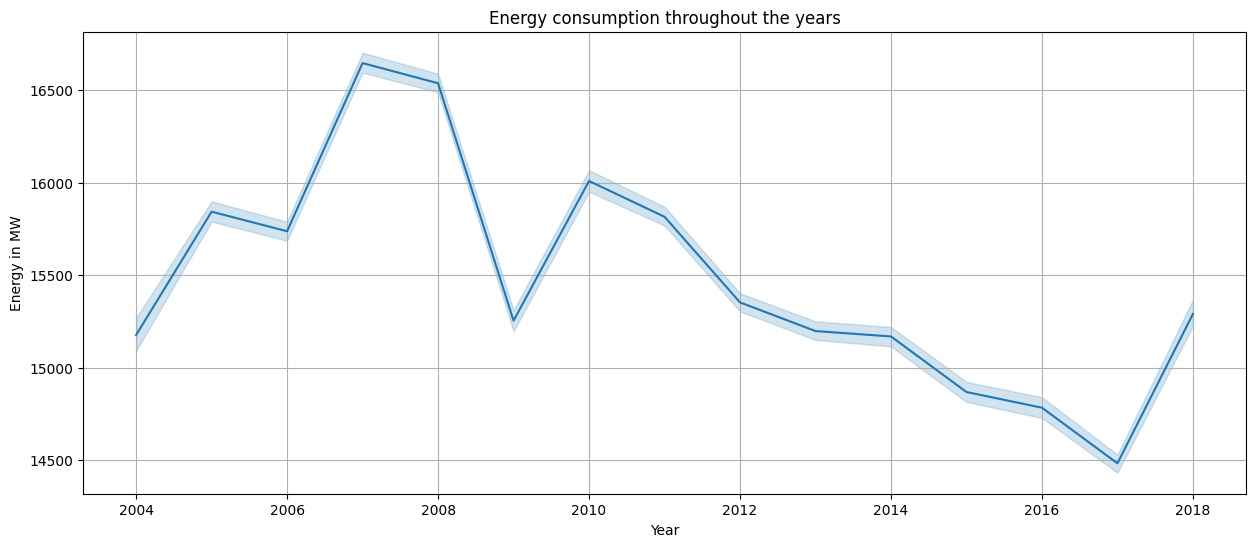

In [3]:
# Plot Energy consumption throughout the years
plt.figure(figsize=(15, 6))
sns.lineplot(x=df["Year"], y=df["AEP_MW"], data=df)
plt.title("Energy consumption throughout the years")
plt.xlabel("Year")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.show()


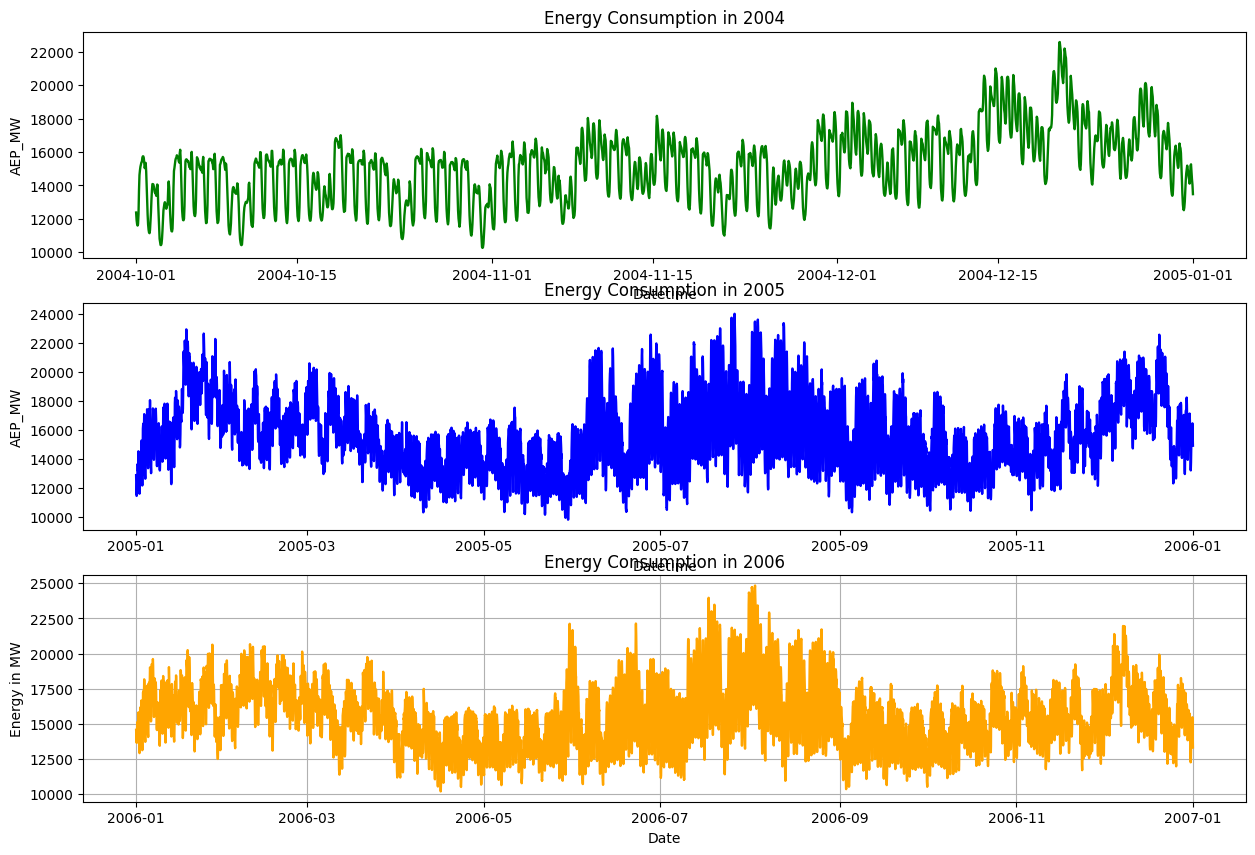

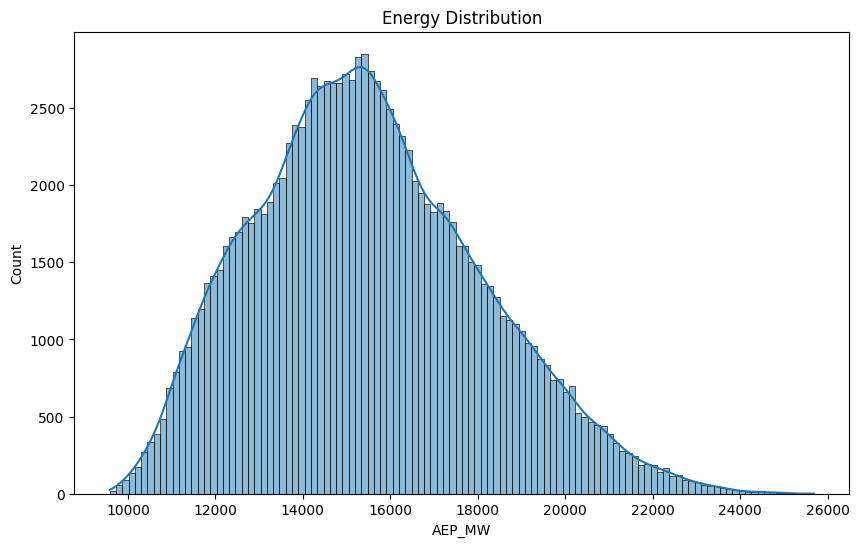

In [4]:
# Filter data for 2004, 2005, and 2006
dataset_2004 = df[df.index.year == 2004]
dataset_2005 = df[df.index.year == 2005]
dataset_2006 = df[df.index.year == 2006]

# Plot energy consumption for each year
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.lineplot(x=dataset_2004.index, y=dataset_2004["AEP_MW"], color="green", linewidth=1.7, ax=axes[0])
axes[0].set_title("Energy Consumption in 2004")
sns.lineplot(x=dataset_2005.index, y=dataset_2005["AEP_MW"], color="blue", linewidth=1.7, ax=axes[1])
axes[1].set_title("Energy Consumption in 2005")
sns.lineplot(x=dataset_2006.index, y=dataset_2006["AEP_MW"], color="orange", linewidth=1.7, ax=axes[2])
axes[2].set_title("Energy Consumption in 2006")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.show() 


# Plot energy distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["AEP_MW"], kde=True)
plt.title("Energy Distribution")
plt.show()


In [5]:
# Resample to daily frequency (only the numeric column)
df_daily = df.resample('D')['AEP_MW'].mean().to_frame() 

# Data splitting
train_size = int(len(df_daily) * 0.8)
train_set = df_daily.iloc[:train_size, :].values  
test_set = df_daily.iloc[train_size:, :].values
test_data = pd.DataFrame(test_set, columns=df_daily.columns, index=df_daily.index[train_size:])

# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = sc.fit_transform(train_set)

# Data preparation for LSTM
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))  
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training
model.fit(X_train, y_train, epochs=50, batch_size=32)



c:\Users\Mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0327
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0154
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0140
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0128
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0120
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0127
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0113
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0110
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0109
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0100
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0095
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0084
Epoch 13/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0077
Epoch 14/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0079
Epoch 15/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


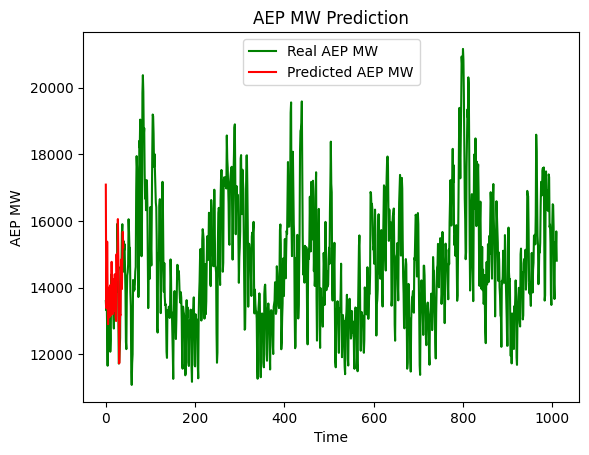

In [6]:

# Make predictions on the test set
dataset_total = pd.concat((df_daily["AEP_MW"][:'2008'], test_data["AEP_MW"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_energy_consumption = model.predict(X_test)
predicted_energy_consumption = sc.inverse_transform(predicted_energy_consumption)

real_energy_consumption = test_data['AEP_MW'].values

# Visualising the results
plt.plot(real_energy_consumption, color = 'green', label = 'Real AEP MW')
plt.plot(predicted_energy_consumption, color = 'red', label = 'Predicted AEP MW')
plt.title('AEP MW Prediction')
plt.xlabel('Time')
plt.ylabel('AEP MW')
plt.legend()
plt.show()
